In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_excel('F1_final.xlsm', sheet_name=['DATASET', 'LASTLAP'])

# Use the already loaded Excel file 'F1_final.xlsm'
xls = pd.ExcelFile('F1_final.xlsm')
print(xls.sheet_names)

df_dataset = pd.read_excel(xls, sheet_name='DATASET')
df_lastlap = pd.read_excel(xls, sheet_name='LASTLAP')

['DATASET', 'Sheet3', 'LASTLAP', 'KPIs', 'DASHBOARD', 'Video']


In [9]:
# LIMPIEZA DE DATOS

# DATASET

cols_drop_dataset = [
    "time_x", "milliseconds_x", "fastestLap", "fastestLapTime",
    "fastestLapSpeed", "rank", "position_x", "positionText"
]
df_dataset = df_dataset.drop(columns=[c for c in cols_drop_dataset if c in df_dataset.columns])

# Convertir columnas clave a numéricas
for col in ["year", "round", "lap", "raceId", "driverId", "constructorId", "grid", "points"]:
    if col in df_dataset.columns:
        df_dataset[col] = pd.to_numeric(df_dataset[col], errors="coerce")

# Resetear índice
df_dataset = df_dataset.reset_index(drop=True)


# LASTLAP
cols_drop_lastlap = ["time_x", "milliseconds_x", "fastestLap", "rank"]
df_lastlap = df_lastlap.drop(columns=[c for c in cols_drop_lastlap if c in df_lastlap.columns])

# Crear columna FASTLAP_sec
import re

def convert_laptime_to_sec(x):
    if pd.isna(x):
        return None
    if isinstance(x, str) and re.match(r"^\d+:\d+\.\d+$", x):
        m, s = x.split(":")
        return int(m) * 60 + float(s)
    return None

if "FASTLAP" in df_lastlap.columns and "fastestLapTime" in df_lastlap.columns:
    df_lastlap["FASTLAP_sec"] = df_lastlap.apply(
        lambda row: convert_laptime_to_sec(row["fastestLapTime"]) if row["FASTLAP"] == "YES" else None,
        axis=1
    )

df_lastlap = df_lastlap.reset_index(drop=True)


# Verificamos la información
print("\n DATASET CLEAN")
print(df_dataset.info())
print("\n LASTLAP CLEAN")
print(df_lastlap.info())



 DATASET CLEAN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115207 entries, 0 to 115206
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   resultId                 115207 non-null  int64         
 1   raceId                   115207 non-null  int64         
 2   driverId                 115207 non-null  int64         
 3   constructorId            115207 non-null  int64         
 4   number                   115207 non-null  int64         
 5   grid                     115207 non-null  int64         
 6   positionOrder            115207 non-null  int64         
 7   points                   115138 non-null  float64       
 8   laps                     115207 non-null  int64         
 9   statusId                 115207 non-null  int64         
 10  year                     115207 non-null  int64         
 11  round                    115207 non-null  int64         
 12  

In [10]:
col_cat_dataset = df_dataset.select_dtypes(include=["object"]).columns
col_cat_lastlap = df_lastlap.select_dtypes(include=["object"]).columns

In [11]:
for columna in col_cat_dataset:

    print(f'La columna {columna} que tiene {df_dataset[columna].nunique()} categorías')

    display(df_dataset[columna].value_counts(dropna=False))


La columna name que tiene 33 categorías


name
Austrian Grand Prix            6516
Spanish Grand Prix             6372
Hungarian Grand Prix           6289
Dutch Grand Prix               5519
Abu Dhabi Grand Prix           5348
Bahrain Grand Prix             5347
Mexico City Grand Prix         5129
São Paulo Grand Prix           4855
Italian Grand Prix             4745
Emilia Romagna Grand Prix      4621
British Grand Prix             4604
Monaco Grand Prix              4107
United States Grand Prix       4048
Canadian Grand Prix            3844
Azerbaijan Grand Prix          3762
Saudi Arabian Grand Prix       3498
Miami Grand Prix               3303
Belgian Grand Prix             3211
Singapore Grand Prix           3202
Qatar Grand Prix               3056
Australian Grand Prix          3031
Portuguese Grand Prix          2531
Styrian Grand Prix             2520
Japanese Grand Prix            2289
Turkish Grand Prix             2223
French Grand Prix              2004
Russian Grand Prix             1971
Las Vegas Grand Prix   

La columna time_race que tiene 21 categorías


time_race
13:00:00    42466
13:10:00    11372
17:00:00     8200
12:00:00     6315
14:00:00     6065
19:00:00     5307
18:00:00     5100
20:00:00     4980
15:00:00     4333
05:00:00     4325
11:00:00     2821
12:10:00     2416
19:30:00     2193
06:00:00     1881
17:10:00     1531
10:10:00     1076
07:00:00     1030
14:10:00     1014
04:00:00      995
11:10:00      946
17:30:00      841
Name: count, dtype: int64

La columna circuitRef que tiene 30 categorías


circuitRef
red_bull_ring    9036
bahrain          6878
catalunya        6372
hungaroring      6289
silverstone      5629
zandvoort        5519
yas_marina       5348
rodriguez        5129
interlagos       4855
monza            4745
imola            4621
monaco           4107
americas         4048
villeneuve       3844
baku             3762
jeddah           3498
miami            3303
spa              3211
marina_bay       3202
losail           3056
albert_park      3031
portimao         2531
suzuka           2289
istanbul         2223
ricard           2004
sochi            1971
vegas            1881
shanghai         1030
nurburgring      1017
mugello           778
Name: count, dtype: int64

La columna name_circuit que tiene 30 categorías


name_circuit
Red Bull Ring                           9036
Bahrain International Circuit           6878
Circuit de Barcelona-Catalunya          6372
Hungaroring                             6289
Silverstone Circuit                     5629
Circuit Park Zandvoort                  5519
Yas Marina Circuit                      5348
Autódromo Hermanos Rodríguez            5129
Autódromo José Carlos Pace              4855
Autodromo Nazionale di Monza            4745
Autodromo Enzo e Dino Ferrari           4621
Circuit de Monaco                       4107
Circuit of the Americas                 4048
Circuit Gilles Villeneuve               3844
Baku City Circuit                       3762
Jeddah Corniche Circuit                 3498
Miami International Autodrome           3303
Circuit de Spa-Francorchamps            3211
Marina Bay Street Circuit               3202
Losail International Circuit            3056
Albert Park Grand Prix Circuit          3031
Autódromo Internacional do Algarve      25

La columna location que tiene 30 categorías


location
Spielberg       9036
Sakhir          6878
Montmeló        6372
Budapest        6289
Silverstone     5629
Zandvoort       5519
Abu Dhabi       5348
Mexico City     5129
São Paulo       4855
Monza           4745
Imola           4621
Monte-Carlo     4107
Austin          4048
Montreal        3844
Baku            3762
Jeddah          3498
Miami           3303
Spa             3211
Marina Bay      3202
Al Daayen       3056
Melbourne       3031
Portimão        2531
Suzuka          2289
Istanbul        2223
Le Castellet    2004
Sochi           1971
Las Vegas       1881
Shanghai        1030
Nürburg         1017
Senni            778
Name: count, dtype: int64

La columna country que tiene 26 categorías


country
Italy           10144
USA              9232
Austria          9036
Bahrain          6878
Spain            6372
Hungary          6289
UK               5629
Netherlands      5519
UAE              5348
Mexico           5129
Brazil           4855
Monaco           4107
Canada           3844
Azerbaijan       3762
Saudi Arabia     3498
Belgium          3211
Singapore        3202
Qatar            3056
Australia        3031
Portugal         2531
Japan            2289
Turkey           2223
France           2004
Russia           1971
China            1030
Germany          1017
Name: count, dtype: int64

La columna driverRef que tiene 36 categorías


driverRef
norris               6120
hamilton             5999
max_verstappen       5912
russell              5887
bottas               5775
perez                5725
sainz                5717
gasly                5656
ocon                 5601
leclerc              5581
stroll               5539
alonso               4972
ricciardo            4760
tsunoda              4552
kevin_magnussen      4323
albon                4305
zhou                 3573
vettel               3276
latifi               3260
hulkenberg           2770
piastri              2551
mick_schumacher      2276
giovinazzi           2146
raikkonen            2068
sargeant             1835
mazepin              1004
kvyat                 986
grosjean              800
lawson                650
de_vries              614
colapinto             397
bearman               170
pietro_fittipaldi     140
kubica                123
aitken                 87
doohan                 57
Name: count, dtype: int64

La columna code que tiene 36 categorías


code
NOR    6120
HAM    5999
VER    5912
RUS    5887
BOT    5775
PER    5725
SAI    5717
GAS    5656
OCO    5601
LEC    5581
STR    5539
ALO    4972
RIC    4760
TSU    4552
MAG    4323
ALB    4305
ZHO    3573
VET    3276
LAT    3260
HUL    2770
PIA    2551
MSC    2276
GIO    2146
RAI    2068
SAR    1835
MAZ    1004
KVY     986
GRO     800
LAW     650
DEV     614
COL     397
BEA     170
FIT     140
KUB     123
AIT      87
DOO      57
Name: count, dtype: int64

La columna forename que tiene 35 categorías


forename
Lando        6120
Lewis        5999
Max          5912
George       5887
Valtteri     5775
Sergio       5725
Carlos       5717
Pierre       5656
Esteban      5601
Charles      5581
Lance        5539
Fernando     4972
Daniel       4760
Yuki         4552
Kevin        4323
Alexander    4305
Guanyu       3573
Sebastian    3276
Nicholas     3260
Nico         2770
Oscar        2551
Mick         2276
Antonio      2146
Kimi         2068
Logan        1835
Nikita       1004
Daniil        986
Romain        800
Liam          650
Nyck          614
Franco        397
Oliver        170
Jack          144
Pietro        140
Robert        123
Name: count, dtype: int64

La columna surname que tiene 36 categorías


surname
Norris        6120
Hamilton      5999
Verstappen    5912
Russell       5887
Bottas        5775
Pérez         5725
Sainz         5717
Gasly         5656
Ocon          5601
Leclerc       5581
Stroll        5539
Alonso        4972
Ricciardo     4760
Tsunoda       4552
Magnussen     4323
Albon         4305
Zhou          3573
Vettel        3276
Latifi        3260
Hülkenber     2770
Piastri       2551
Schumacher    2276
Giovinazzi    2146
Räikkönen     2068
Sargeant      1835
Mazepin       1004
Kvyat          986
Grosjean       800
Lawson         650
de Vries       614
Colapinto      397
Bearman        170
Fittipaldi     140
Kubica         123
Aitken          87
Doohan          57
Name: count, dtype: int64

La columna nationality que tiene 21 categorías


nationality
British          18263
French           12057
Spanish          10689
Canadian          8799
German            8322
Finnish           7843
Australian        7368
Dutch             6526
Mexican           5725
Monegasque        5581
Japanese          4552
Danish            4323
Thai              4305
Chinese           3573
Italian           2146
Russian           1990
American          1835
New Zealander      650
Argentinian        397
Brazilian          140
Polish             123
Name: count, dtype: int64

La columna constructorRef que tiene 14 categorías


constructorRef
mercedes        12050
mclaren         12014
red_bull        11752
ferrari         11379
haas            11214
williams        10906
aston_martin     9824
alpine           9602
alfa             9005
alphatauri       8862
sauber           2553
rb               2449
renault          1823
racing_point     1774
Name: count, dtype: int64

La columna name_constructor que tiene 14 categorías


name_constructor
Mercedes          12050
McLaren           12014
Red Bull          11752
Ferrari           11379
Haas F1 Team      11214
Williams          10906
Aston Martin       9824
Alpine F1 Team     9602
Alfa Romeo         9005
AlphaTauri         8862
Sauber             2553
RB F1 Team         2449
Renault            1823
Racing Point       1774
Name: count, dtype: int64

La columna nationality_constructor que tiene 7 categorías


nationality_constructor
British     34518
Italian     22690
German      12050
Austrian    11752
Swiss       11558
French      11425
American    11214
Name: count, dtype: int64

La columna status que tiene 49 categorías


status
Finished            73597
+1 Lap              29645
+2 Laps              3533
Accident              981
Collision damage      870
Engine                826
Collision             729
Retired               671
Gearbox               509
Power Unit            428
+3 Laps               423
Brakes                217
Disqualified          200
Hydraulics            160
Fuel pressure         159
Undertray             155
Puncture              142
Suspension            131
Mechanical            129
Overheating           125
Electronics           116
Withdrew              102
Spun off               93
Water pressure         91
Power loss             89
Illness                87
Oil leak               86
Rear wing              69
+5 Laps                65
+7 Laps                64
Radiator               58
Front wing             56
Wheel                  53
Technical              51
Damage                 48
+6 Laps                47
Vibrations             46
Differential           43
Steer

La columna time_y que tiene 46928 categorías


time_y
1:22.438    14
1:21.033    14
1:23.239    14
1:21.789    13
1:23.854    13
            ..
2:03.413     1
1:56.467     1
1:09.407     1
1:09.185     1
1:09.051     1
Name: count, Length: 46928, dtype: int64

In [12]:
for columna in col_cat_lastlap:

    print(f'La columna {columna} que tiene {df_lastlap[columna].nunique()} categorías')

    display(df_lastlap[columna].value_counts(dropna=False))

La columna position_x que tiene 21 categorías


position_x
\N    196
4     105
10    105
6     105
1     105
12    105
5     105
8     105
9     105
7     105
2     105
3     105
11    105
13    104
14    102
15     98
16     88
17     82
18     57
19     31
20     10
Name: count, dtype: int64

La columna positionText que tiene 22 categorías


positionText
R     192
4     105
10    105
6     105
1     105
12    105
5     105
8     105
9     105
7     105
2     105
3     105
11    105
13    104
14    102
15     98
16     88
17     82
18     57
19     31
20     10
D       4
Name: count, dtype: int64

La columna FASTLAP que tiene 2 categorías


FASTLAP
NO     1935
YES      93
Name: count, dtype: int64

La columna fastestLapTime que tiene 1966 categorías


fastestLapTime
1:21.645    3
1:18.334    2
1:31.408    2
1:31.921    2
1:38.075    2
           ..
1:22.384    1
1:23.355    1
1:23.889    1
1:23.218    1
1:29.121    1
Name: count, Length: 1966, dtype: int64

La columna name que tiene 33 categorías


name
Spanish Grand Prix             100
Abu Dhabi Grand Prix            98
Italian Grand Prix              98
Austrian Grand Prix             97
Bahrain Grand Prix              97
British Grand Prix              93
Hungarian Grand Prix            92
Dutch Grand Prix                80
Azerbaijan Grand Prix           80
Emilia Romagna Grand Prix       78
United States Grand Prix        77
Saudi Arabian Grand Prix        77
Belgian Grand Prix              76
Mexico City Grand Prix          75
São Paulo Grand Prix            73
Canadian Grand Prix             60
Miami Grand Prix                60
Monaco Grand Prix               59
Singapore Grand Prix            58
Australian Grand Prix           57
Qatar Grand Prix                56
Japanese Grand Prix             56
French Grand Prix               40
Las Vegas Grand Prix            40
Turkish Grand Prix              40
Portuguese Grand Prix           39
Styrian Grand Prix              38
Russian Grand Prix              38
Eifel Grand Pri

La columna time_race que tiene 1 categorías


time_race
13:00:00    2028
Name: count, dtype: int64

La columna circuitRef que tiene 30 categorías


circuitRef
red_bull_ring    135
bahrain          115
silverstone      113
catalunya        100
yas_marina        98
monza             98
hungaroring       92
baku              80
zandvoort         80
imola             78
jeddah            77
americas          77
spa               76
rodriguez         75
interlagos        73
miami             60
villeneuve        60
monaco            59
marina_bay        58
albert_park       57
suzuka            56
losail            56
istanbul          40
ricard            40
vegas             40
portimao          39
sochi             38
nurburgring       20
shanghai          20
mugello           18
Name: count, dtype: int64

La columna name_circuit que tiene 30 categorías


name_circuit
Red Bull Ring                           135
Bahrain International Circuit           115
Silverstone Circuit                     113
Circuit de Barcelona-Catalunya          100
Yas Marina Circuit                       98
Autodromo Nazionale di Monza             98
Hungaroring                              92
Baku City Circuit                        80
Circuit Park Zandvoort                   80
Autodromo Enzo e Dino Ferrari            78
Jeddah Corniche Circuit                  77
Circuit of the Americas                  77
Circuit de Spa-Francorchamps             76
Autódromo Hermanos Rodríguez             75
Autódromo José Carlos Pace               73
Miami International Autodrome            60
Circuit Gilles Villeneuve                60
Circuit de Monaco                        59
Marina Bay Street Circuit                58
Albert Park Grand Prix Circuit           57
Suzuka Circuit                           56
Losail International Circuit             56
Istanbul Park      

La columna location que tiene 30 categorías


location
Spielberg       135
Zallaq          115
Silverstone     113
Montmeló        100
Abu Dhabi        98
Monza            98
Budapest         92
Baku             80
Zandvoort        80
Imola            78
Jeddah           77
Austin           77
Spa              76
Mexico City      75
São Paulo        73
Miami            60
Montreal         60
Monte-Carlo      59
Singapore        58
Melbourne        57
Suzuka           56
Doha             56
Istanbul         40
Le Castellet     40
Las Vegas        40
Portimão         39
Sochi            38
Nürburg          20
Shanghai         20
Senni            18
Name: count, dtype: int64

La columna country que tiene 26 categorías


country
Italy           194
USA             177
Austria         135
Bahrain         115
UK              113
Spain           100
UAE              98
Hungary          92
Azerbaijan       80
Netherlands      80
Saudi Arabia     77
Belgium          76
Mexico           75
Brazil           73
Canada           60
Monaco           59
Singapore        58
Australia        57
Japan            56
Qatar            56
France           40
Turkey           40
Portugal         39
Russia           38
Germany          20
China            20
Name: count, dtype: int64

La columna driverRef que tiene 36 categorías


driverRef
russell              104
norris               104
bottas               103
max_verstappen       102
ocon                 101
hamilton             101
perez                100
gasly                100
leclerc               99
stroll                99
sainz                 97
alonso                88
tsunoda               82
ricciardo             81
kevin_magnussen       78
albon                 77
zhou                  66
latifi                59
vettel                57
hulkenberg            49
piastri               44
mick_schumacher       41
giovinazzi            38
raikkonen             35
sargeant              35
mazepin               18
kvyat                 17
grosjean              14
lawson                11
de_vries              11
colapinto              8
bearman                3
pietro_fittipaldi      2
kubica                 2
aitken                 1
doohan                 1
Name: count, dtype: int64

La columna code que tiene 36 categorías


code
RUS    104
NOR    104
BOT    103
VER    102
OCO    101
HAM    101
PER    100
GAS    100
LEC     99
STR     99
SAI     97
ALO     88
TSU     82
RIC     81
MAG     78
ALB     77
ZHO     66
LAT     59
VET     57
HUL     49
PIA     44
MSC     41
GIO     38
RAI     35
SAR     35
MAZ     18
KVY     17
GRO     14
LAW     11
DEV     11
COL      8
BEA      3
FIT      2
KUB      2
AIT      1
DOO      1
Name: count, dtype: int64

La columna forename que tiene 35 categorías


forename
George       104
Lando        104
Valtteri     103
Max          102
Esteban      101
Lewis        101
Pierre       100
Sergio       100
Lance         99
Charles       99
Carlos        97
Fernando      88
Yuki          82
Daniel        81
Kevin         78
Alexander     77
Guanyu        66
Nicholas      59
Sebastian     57
Nico          49
Oscar         44
Mick          41
Antonio       38
Kimi          35
Logan         35
Nikita        18
Daniil        17
Romain        14
Nyck          11
Liam          11
Franco         8
Oliver         3
Jack           2
Pietro         2
Robert         2
Name: count, dtype: int64

La columna surname que tiene 36 categorías


surname
Russell       104
Norris        104
Bottas        103
Verstappen    102
Ocon          101
Hamilton      101
Pérez         100
Gasly         100
Leclerc        99
Stroll         99
Sainz          97
Alonso         88
Tsunoda        82
Ricciardo      81
Magnussen      78
Albon          77
Zhou           66
Latifi         59
Vettel         57
Hülkenber      49
Piastri        44
Schumacher     41
Giovinazzi     38
Räikkönen      35
Sargeant       35
Mazepin        18
Kvyat          17
Grosjean       14
Lawson         11
de Vries       11
Colapinto       8
Bearman         3
Fittipaldi      2
Kubica          2
Aitken          1
Doohan          1
Name: count, dtype: int64

La columna nationality que tiene 21 categorías


nationality
British          313
French           215
Spanish          185
Canadian         158
German           147
Finnish          138
Australian       126
Dutch            113
Mexican          100
Monegasque        99
Japanese          82
Danish            78
Thai              77
Chinese           66
Italian           38
Russian           35
American          35
New Zealander     11
Argentinian        8
Polish             2
Brazilian          2
Name: count, dtype: int64

La columna constructorRef que tiene 14 categorías


constructorRef
mercedes        205
mclaren         205
red_bull        204
williams        201
haas            200
ferrari         198
aston_martin    173
alpine          170
alfa            161
alphatauri      157
sauber           46
rb               44
renault          33
racing_point     31
Name: count, dtype: int64

La columna name_constructor que tiene 14 categorías


name_constructor
Mercedes          205
McLaren           205
Red Bull          204
Williams          201
Haas F1 Team      200
Ferrari           198
Aston Martin      173
Alpine F1 Team    170
Alfa Romeo        161
AlphaTauri        157
Sauber             46
RB F1 Team         44
Renault            33
Racing Point       31
Name: count, dtype: int64

La columna nationality_constructor que tiene 7 categorías


nationality_constructor
British     610
Italian     399
Swiss       207
German      205
Austrian    204
French      203
American    200
Name: count, dtype: int64

La columna status que tiene 49 categorías


status
Finished            1251
+1 Lap               478
+2 Laps               55
Accident              31
Collision damage      27
Engine                26
Collision             24
Retired               16
Gearbox               15
Power Unit            12
Brakes                 9
+3 Laps                6
Hydraulics             5
Water pressure         4
Suspension             4
Overheating            4
Disqualified           4
Undertray              4
Power loss             3
Mechanical             3
Fuel pressure          3
Electronics            3
Spun off               3
Radiator               3
Oil leak               3
Puncture               3
Water leak             2
Withdrew               2
Rear wing              2
Electrical             2
Turbo                  2
Illness                2
Wheel                  1
Debris                 1
+5 Laps                1
Transmission           1
Damage                 1
Wheel nut              1
Fuel leak              1
Cooling system    

La columna time_y que tiene 1991 categorías


time_y
1:33.202    2
1:15.349    2
1:25.849    2
1:39.650    2
1:38.684    2
           ..
1:23.889    1
1:23.241    1
1:26.522    1
1:27.784    1
1:08.412    1
Name: count, Length: 1991, dtype: int64

In [13]:
df_dataset.columns, df_lastlap.columns

(Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
        'positionOrder', 'points', 'laps', 'statusId', 'year', 'round',
        'circuitId', 'name', 'date', 'time_race', 'circuitRef', 'name_circuit',
        'location', 'country', 'lat', 'lng', 'alt', 'driverRef',
        'number_driver', 'code', 'forename', 'surname', 'dob', 'nationality',
        'constructorRef', 'name_constructor', 'nationality_constructor',
        'status', 'lap', 'position_y', 'time_y', 'milliseconds_y'],
       dtype='object'),
 Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
        'position_x', 'positionText', 'positionOrder', 'points', 'laps',
        'FASTLAP', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
        'round', 'circuitId', 'name', 'date', 'time_race', 'circuitRef',
        'name_circuit', 'location', 'country', 'lat', 'LAT_REAL', 'lng',
        'LONG_REAL', 'alt', 'driverRef', 'number_driver', 'code', 'forename',
        'surn

In [14]:
df_dataset.shape, df_lastlap.shape

((115207, 38), (2028, 46))

In [15]:
df_dataset.info()
df_lastlap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115207 entries, 0 to 115206
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   resultId                 115207 non-null  int64         
 1   raceId                   115207 non-null  int64         
 2   driverId                 115207 non-null  int64         
 3   constructorId            115207 non-null  int64         
 4   number                   115207 non-null  int64         
 5   grid                     115207 non-null  int64         
 6   positionOrder            115207 non-null  int64         
 7   points                   115138 non-null  float64       
 8   laps                     115207 non-null  int64         
 9   statusId                 115207 non-null  int64         
 10  year                     115207 non-null  int64         
 11  round                    115207 non-null  int64         
 12  circuitId       

In [16]:
# Número de temporadas y carreras
print("Número de temporadas:", df_dataset['year'].nunique())
print("Número de carreras:", df_dataset['raceId'].nunique())

Número de temporadas: 5
Número de carreras: 105


In [17]:
# Número de pilotos y equipos
print("\nNúmero de pilotos:", df_dataset['driverId'].nunique())
print("Número de constructores:", df_dataset['constructorId'].nunique())


Número de pilotos: 36
Número de constructores: 14


In [18]:
# Pilotos con más vueltas
print("\nTop 10 pilotos con más vueltas registradas:")
display(df_dataset['driverRef'].value_counts().head(10))


Top 10 pilotos con más vueltas registradas:


driverRef
norris            6120
hamilton          5999
max_verstappen    5912
russell           5887
bottas            5775
perez             5725
sainz             5717
gasly             5656
ocon              5601
leclerc           5581
Name: count, dtype: int64

In [19]:
# Constructores con más vueltas registradas
print("\nTop 10 constructores con más vueltas registradas:")
display(df_dataset['constructorRef'].value_counts().head(10))


Top 10 constructores con más vueltas registradas:


constructorRef
mercedes        12050
mclaren         12014
red_bull        11752
ferrari         11379
haas            11214
williams        10906
aston_martin     9824
alpine           9602
alfa             9005
alphatauri       8862
Name: count, dtype: int64

In [20]:
cols_stats = ["grid", "positionOrder", "points", "laps", "milliseconds_y"]
df_dataset[cols_stats].describe().T.round(2)



,count,mean,std,min,25%,50%,75%,max
grid,115207.0,9.91,5.82,0.0,5.0,10.0,15.0,20.0
positionOrder,115207.0,9.72,5.40,1.0,5.0,10.0,14.0,20.0
points,115138.0,0.09,1.19,0.0,0.0,0.0,0.0,26.0
laps,115207.0,60.07,10.67,0.0,53.0,58.0,70.0,87.0
milliseconds_y,115207.0,96585.82,90547.36,55404.0,81537.0,89556.0,99779.0,3204155.0


In [21]:
# ANÁLISIS DESCRIPTIVO INICIAL

# Dimensiones de los datasets
print("Dataset - Todas las vueltas:", df_dataset.shape)
print("Dataset - Última vuelta:", df_lastlap.shape)

# Primeras y últimas filas
print("\nHEAD DATASET")
display(df_dataset.head())

print("\nTAIL DATASET")
display(df_dataset.tail())

print("\nHEAD LASTLAP")
display(df_lastlap.head())

print("\nTAIL LASTLAP")
display(df_lastlap.tail())

# Información general
print("\nINFO DATASET")
df_dataset.info()

print("\nINFO LASTLAP")
df_lastlap.info()

# Descripción estadística de las variables numéricas
print("\nDESCRIBE DATASET")
print(df_dataset.describe().T)

print("\nDESCRIBE LASTLAP")
print(df_lastlap.describe().T)


Dataset - Todas las vueltas: (115207, 38)
Dataset - Última vuelta: (2028, 46)

HEAD DATASET


,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,name,date,time_race,circuitRef,name_circuit,location,country,lat,lng,alt,driverRef,number_driver,code,forename,surname,dob,nationality,constructorRef,name_constructor,nationality_constructor,status,lap,position_y,time_y,milliseconds_y
0,24626,1031,822,131,77,1,1,0.0,71,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197.0,147647.0,678,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,mercedes,Mercedes,German,Finished,1,1,1:11.454,71454
1,24626,1031,822,131,77,1,1,0.0,71,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197.0,147647.0,678,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,mercedes,Mercedes,German,Finished,2,1,1:09.441,69441
2,24626,1031,822,131,77,1,1,0.0,71,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197.0,147647.0,678,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,mercedes,Mercedes,German,Finished,3,1,1:09.598,69598
3,24626,1031,822,131,77,1,1,0.0,71,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197.0,147647.0,678,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,mercedes,Mercedes,German,Finished,4,1,1:09.592,69592
4,24626,1031,822,131,77,1,1,0.0,71,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197.0,147647.0,678,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,mercedes,Mercedes,German,Finished,5,1,1:09.159,69159



TAIL DATASET


,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,name,date,time_race,circuitRef,name_circuit,location,country,lat,lng,alt,driverRef,number_driver,code,forename,surname,dob,nationality,constructorRef,name_constructor,nationality_constructor,status,lap,position_y,time_y,milliseconds_y
115202,26763,1144,861,3,43,20,19,0.0,26,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672.0,546031.0,3,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,williams,Williams,British,Engine,22,19,1:30.317,90317
115203,26763,1144,861,3,43,20,19,0.0,26,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672.0,546031.0,3,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,williams,Williams,British,Engine,23,19,1:30.387,90387
115204,26763,1144,861,3,43,20,19,0.0,26,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672.0,546031.0,3,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,williams,Williams,British,Engine,24,19,1:30.528,90528
115205,26763,1144,861,3,43,20,19,0.0,26,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672.0,546031.0,3,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,williams,Williams,British,Engine,25,19,1:30.254,90254
115206,26763,1144,861,3,43,20,19,0.0,26,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672.0,546031.0,3,colapinto,43,COL,Franco,Colapinto,2003-05-27,Argentinian,williams,Williams,British,Engine,26,19,1:40.514,100514



HEAD LASTLAP


,resultId,raceId,driverId,constructorId,number,grid,position_x,positionText,positionOrder,points,laps,FASTLAP,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_race,circuitRef,name_circuit,location,country,lat,LAT_REAL,lng,LONG_REAL,alt,driverRef,number_driver,code,forename,surname,dob,nationality,constructorRef,name_constructor,nationality_constructor,status,lap,position_y,time_y,milliseconds_y,FASTLAP_sec
0,24629,1031,1,131,44,5,4,4,4,12,71,NO,1:07.712,229.57,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:00:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197,47.2197,147647,14.7647,678,hamilton,44,HAM,Lewis,Hamilton,31054,British,mercedes,Mercedes,German,Finished,71,2,1:08.203,68203,NaN
1,24639,1031,8,51,7,19,\N,R,14,0,53,NO,1:09.031,225.19,36,2020,1,70,Austrian Grand Prix,2020-07-05,13:00:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197,47.2197,147647,14.7647,678,raikkonen,7,RAI,Kimi,Räikkönen,29145,Finnish,alfa,Alfa Romeo,Swiss,Wheel,53,12,1:27.815,87815,NaN
2,24635,1031,20,6,5,11,10,10,10,1,71,NO,1:08.623,226.52,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:00:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197,47.2197,147647,14.7647,678,vettel,5,VET,Sebastian,Vettel,31961,German,ferrari,Ferrari,Italian,Finished,71,10,1:08.623,68623,NaN
3,24641,1031,154,210,8,15,\N,R,16,0,49,NO,1:10.228,221.35,23,2020,1,70,Austrian Grand Prix,2020-07-05,13:00:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197,47.2197,147647,14.7647,678,grosjean,8,GRO,Romain,Grosjean,31519,French,haas,Haas F1 Team,American,Brakes,49,16,2:06.287,126287,NaN
4,24631,1031,815,211,11,6,6,6,6,8,71,NO,1:08.305,227.58,1,2020,1,70,Austrian Grand Prix,2020-07-05,13:00:00,red_bull_ring,Red Bull Ring,Spielberg,Austria,472197,47.2197,147647,14.7647,678,perez,11,PER,Sergio,Pérez,32899,Mexican,racing_point,Racing Point,British,Finished,71,6,1:10.280,70280,NaN



TAIL LASTLAP


,resultId,raceId,driverId,constructorId,number,grid,position_x,positionText,positionOrder,points,laps,FASTLAP,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_race,circuitRef,name_circuit,location,country,lat,LAT_REAL,lng,LONG_REAL,alt,driverRef,number_driver,code,forename,surname,dob,nationality,constructorRef,name_constructor,nationality_constructor,status,lap,position_y,time_y,milliseconds_y,FASTLAP_sec
2023,26757,1144,855,15,24,15,13,13,13,0,57,NO,1:27.982,216.09,11,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672,24.4672,546031,54.6031,3,zhou,24,ZHO,Guanyu,Zhou,36310,Chinese,sauber,Sauber,Swiss,+1 Lap,57,14,1:28.374,88374,NaN
2024,26754,1144,857,1,81,2,10,10,10,1,58,NO,1:27.690,216.80,1,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672,24.4672,546031,54.6031,3,piastri,81,PIA,Oscar,Piastri,36987,Australian,mclaren,McLaren,British,Finished,58,10,1:28.010,88010,NaN
2025,26761,1144,859,215,30,12,17,17,17,0,55,NO,1:28.751,214.21,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672,24.4672,546031,54.6031,3,lawson,30,LAW,Liam,Lawson,37298,New Zealander,rb,RB F1 Team,Italian,Engine,55,17,1:29.184,89184,NaN
2026,26763,1144,861,3,43,20,\N,R,19,0,26,NO,1:29.411,212.63,5,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672,24.4672,546031,54.6031,3,colapinto,43,COL,Franco,Colapinto,37768,Argentinian,williams,Williams,British,Engine,26,19,1:40.514,100514,NaN
2027,26759,1144,862,214,61,17,15,15,15,0,57,NO,1:29.121,213.32,11,2024,24,24,Abu Dhabi Grand Prix,2024-12-08,13:00:00,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,244672,24.4672,546031,54.6031,3,doohan,61,DOO,Jack,Doohan,37641,Australian,alpine,Alpine F1 Team,French,+1 Lap,57,15,1:29.566,89566,NaN



INFO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115207 entries, 0 to 115206
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   resultId                 115207 non-null  int64         
 1   raceId                   115207 non-null  int64         
 2   driverId                 115207 non-null  int64         
 3   constructorId            115207 non-null  int64         
 4   number                   115207 non-null  int64         
 5   grid                     115207 non-null  int64         
 6   positionOrder            115207 non-null  int64         
 7   points                   115138 non-null  float64       
 8   laps                     115207 non-null  int64         
 9   statusId                 115207 non-null  int64         
 10  year                     115207 non-null  int64         
 11  round                    115207 non-null  int64         
 12  ci

In [22]:
# Distribución de posiciones de salida
print("\nDistribución de posiciones de salida (grid):")
display(df_dataset['grid'].value_counts().head(10))



Distribución de posiciones de salida (grid):


grid
2     6044
6     5994
7     5951
3     5946
4     5868
5     5846
1     5825
9     5768
8     5760
12    5739
Name: count, dtype: int64

In [23]:
# Distribución de posiciones finales
print("\nDistribución de posiciones finales (positionOrder):")
display(df_dataset['positionOrder'].value_counts().head(10))


Distribución de posiciones finales (positionOrder):


positionOrder
1     6318
2     6318
3     6318
4     6316
5     6314
6     6311
7     6309
8     6305
9     6298
10    6288
Name: count, dtype: int64

In [24]:
# Tiempos de vuelta: estadísticas básicas
print("\nTiempos de vuelta (milliseconds_y) - estadísticas básicas:")
display(df_dataset['milliseconds_y'].describe().round(2))


Tiempos de vuelta (milliseconds_y) - estadísticas básicas:


count     115207.00
mean       96585.82
std        90547.36
min        55404.00
25%        81537.00
50%        89556.00
75%        99779.00
max      3204155.00
Name: milliseconds_y, dtype: float64

In [25]:
col_cat_dataset = df_dataset.select_dtypes(include='object').columns
col_cat_lastlap = df_lastlap.select_dtypes(include='object').columns

In [26]:
df_dataset['name_circuit'].value_counts().index

Index(['Red Bull Ring', 'Bahrain International Circuit',
       'Circuit de Barcelona-Catalunya', 'Hungaroring', 'Silverstone Circuit',
       'Circuit Park Zandvoort', 'Yas Marina Circuit',
       'Autódromo Hermanos Rodríguez', 'Autódromo José Carlos Pace',
       'Autodromo Nazionale di Monza', 'Autodromo Enzo e Dino Ferrari',
       'Circuit de Monaco', 'Circuit of the Americas',
       'Circuit Gilles Villeneuve', 'Baku City Circuit',
       'Jeddah Corniche Circuit', 'Miami International Autodrome',
       'Circuit de Spa-Francorchamps', 'Marina Bay Street Circuit',
       'Losail International Circuit', 'Albert Park Grand Prix Circuit',
       'Autódromo Internacional do Algarve', 'Suzuka Circuit', 'Istanbul Park',
       'Circuit Paul Ricard', 'Sochi Autodrom',
       'Las Vegas Strip Street Circuit', 'Shanghai International Circuit',
       'Nürburgring', 'Autodromo Internazionale del Mugello'],
      dtype='object', name='name_circuit')

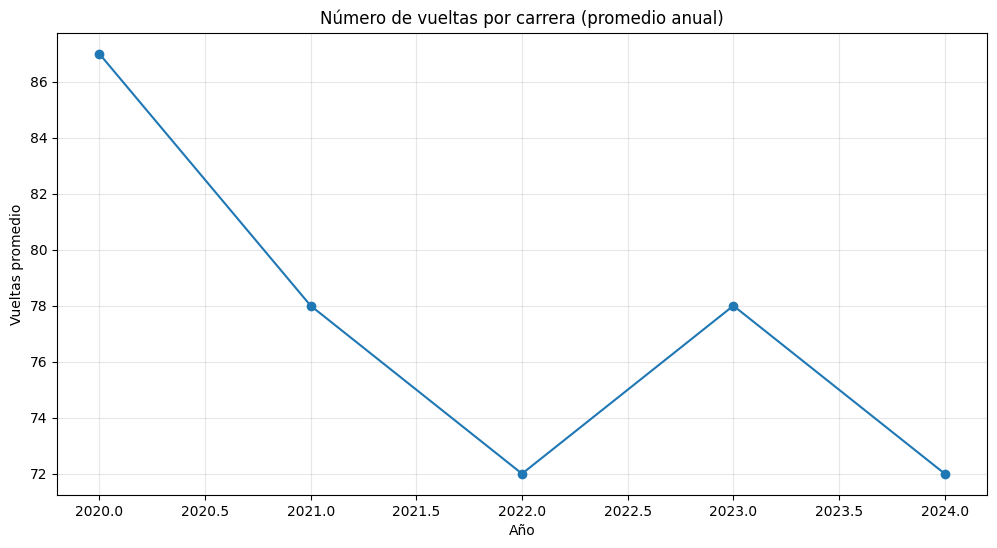

In [27]:
# Evolución del número de vueltas por carrera a lo largo de los años
laps_per_year = df_dataset.groupby("year")["lap"].max()

plt.figure(figsize=(12,6))
laps_per_year.plot(marker="o")
plt.title("Número de vueltas por carrera (promedio anual)")
plt.xlabel("Año")
plt.ylabel("Vueltas promedio")
plt.grid(alpha=0.3)
plt.show()


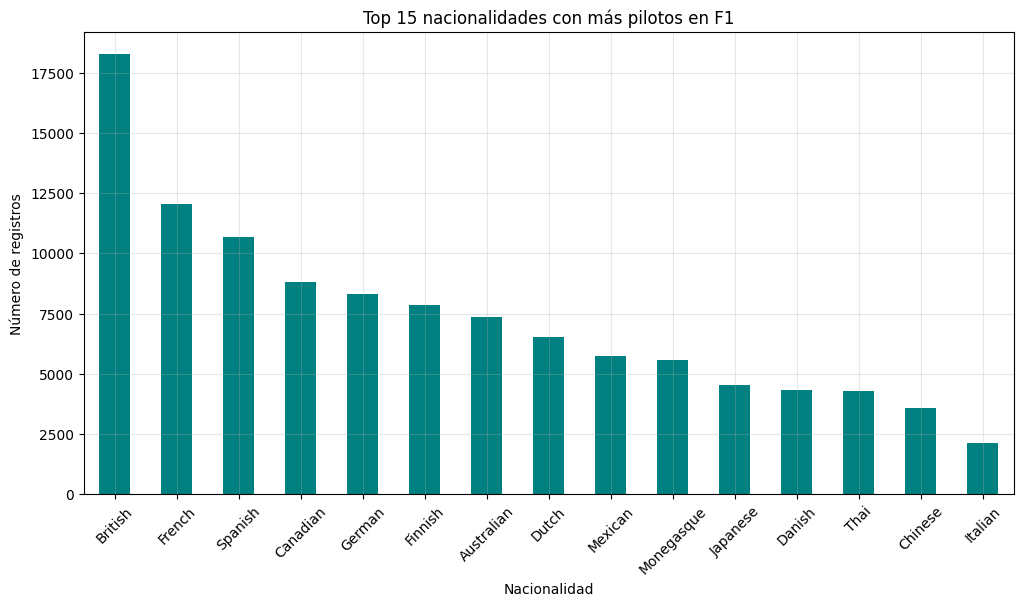

In [28]:
# Top 15 nacionalidades con más pilotos en F1
plt.figure(figsize=(12,6))
df_dataset["nationality"].value_counts().head(15).plot(kind="bar", color="teal")
plt.title("Top 15 nacionalidades con más pilotos en F1")
plt.xlabel("Nacionalidad")
plt.ylabel("Número de registros")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


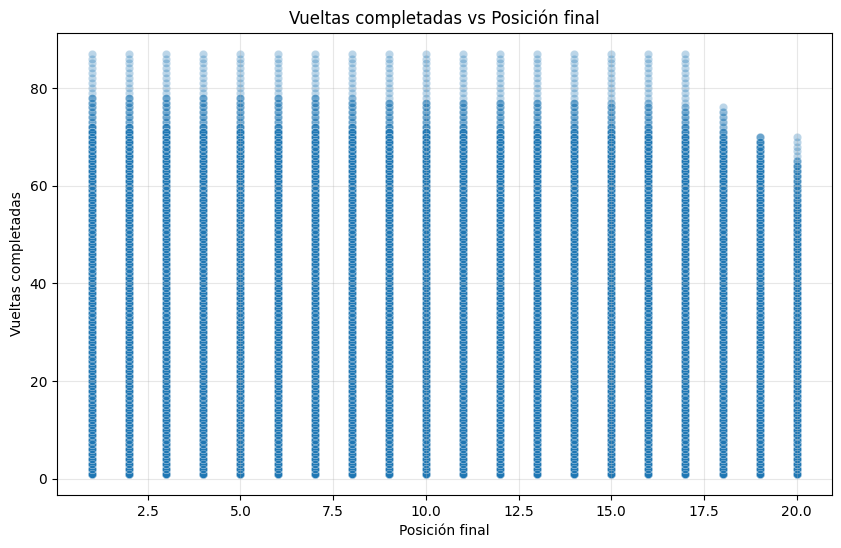

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_dataset,
    x="position_y", 
    y="lap",
    alpha=0.3
)
plt.title("Vueltas completadas vs Posición final")
plt.xlabel("Posición final")
plt.ylabel("Vueltas completadas")
plt.grid(alpha=0.3)
plt.show()


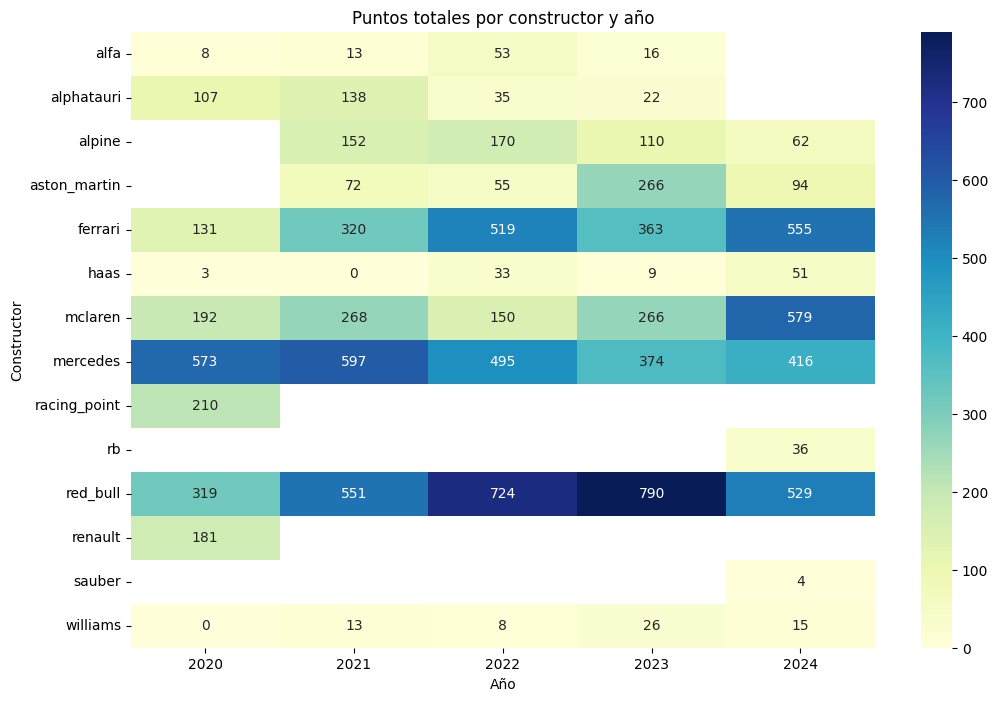

In [30]:
# Puntos totales por constructor y año
puntos_heatmap = df_dataset.groupby(["year","constructorRef"])["points"].sum().reset_index()
pivot = puntos_heatmap.pivot(index="constructorRef", columns="year", values="points")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Puntos totales por constructor y año")
plt.xlabel("Año")
plt.ylabel("Constructor")
plt.show()


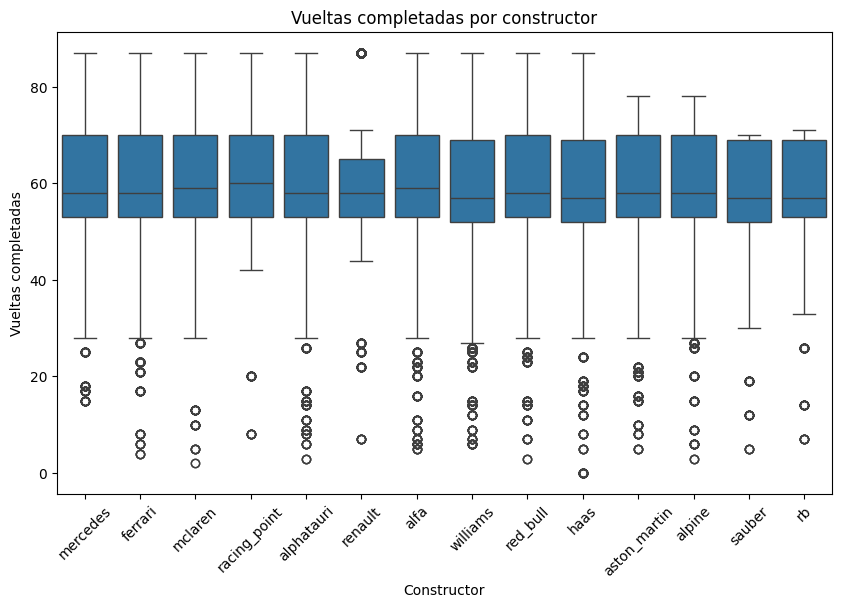

In [31]:
# Distribución de vueltas completadas por constructor
plt.figure(figsize=(10,6))
sns.boxplot(data=df_dataset, x="constructorRef", y="laps")
plt.title("Vueltas completadas por constructor")
plt.xlabel("Constructor")
plt.ylabel("Vueltas completadas")
plt.xticks(rotation=45)
plt.show()


In [32]:
cols_stats_last = ["grid", "positionOrder", "points", "laps", "FASTLAP_sec"]
df_lastlap[cols_stats_last].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
grid,2028.0,10.01,5.82,0.0,5.0,10.0,15.00,20.00
positionOrder,2028.0,10.19,5.62,1.0,5.0,10.0,15.00,20.00
points,2028.0,5.26,7.31,0.0,0.0,1.0,10.00,26.00
laps,2028.0,56.79,13.68,0.0,52.0,57.0,69.00,87.00
FASTLAP_sec,93.0,84.88,11.15,55.4,76.7,83.2,92.61,109.35


In [33]:
# Última vuelta: mejores FASTLAP
print("\nMejor FASTLAP registrado (segundos):")
display(df_lastlap.loc[df_lastlap["FASTLAP"] == "YES", "FASTLAP_sec"].min())


Mejor FASTLAP registrado (segundos):


np.float64(55.404)

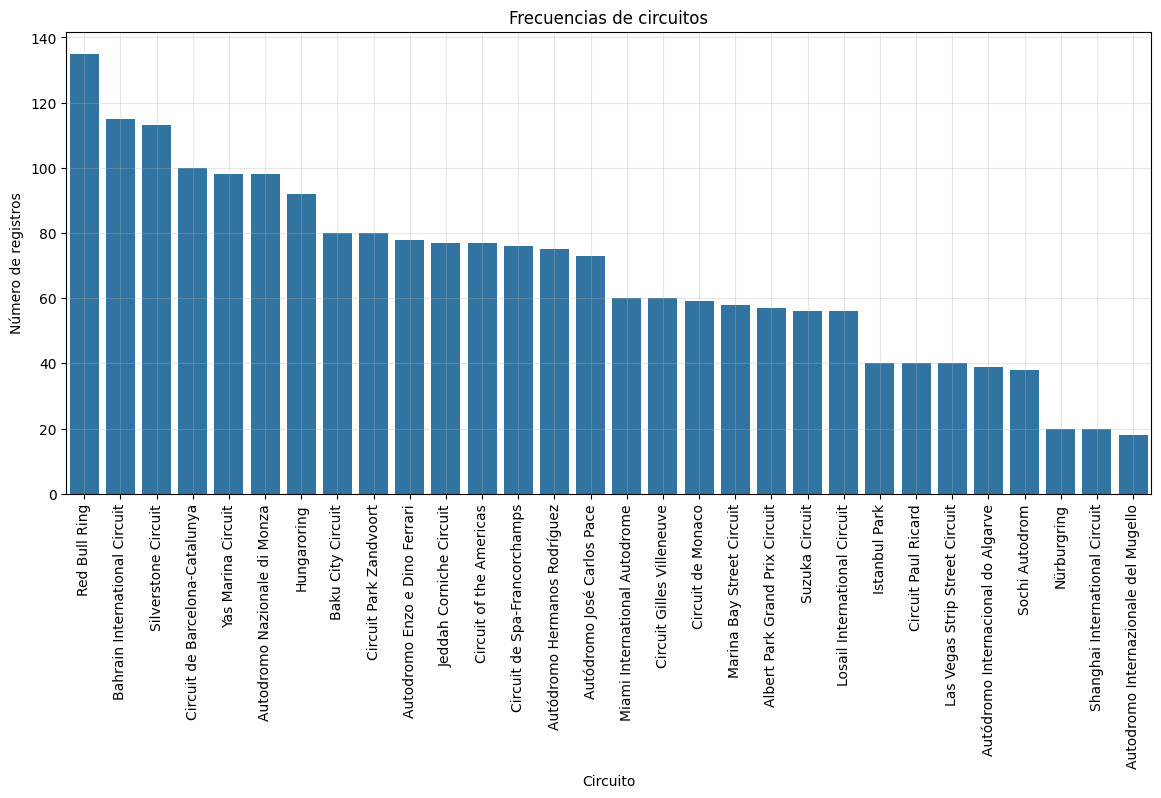

In [34]:
# Frecuencias de circuitos en el dataset LASTLAP
plt.figure(figsize=(14,6))
sns.countplot(data=df_lastlap, x='name_circuit', order=df_lastlap['name_circuit'].value_counts().index)

plt.title('Frecuencias de circuitos')
plt.xlabel('Circuito')
plt.ylabel('Número de registros')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)

plt.show()


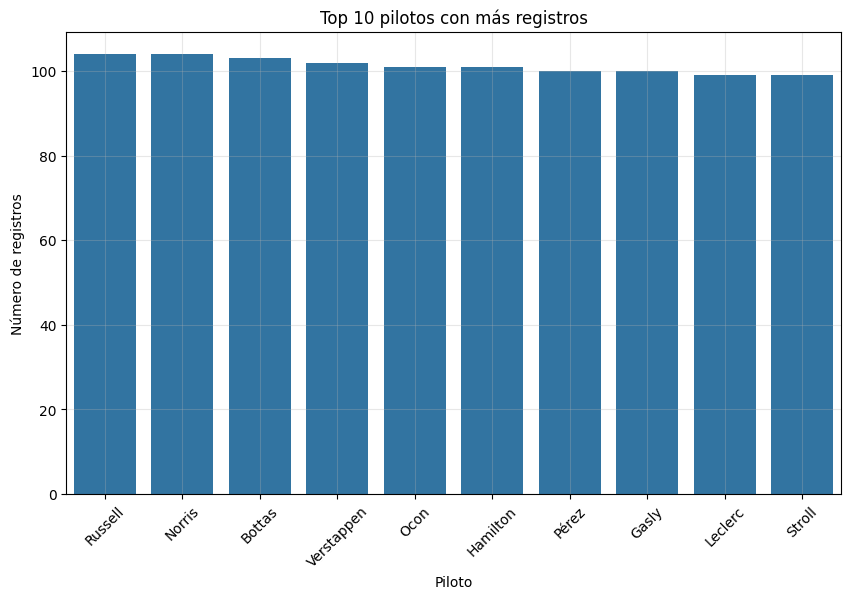

In [35]:
# Top 10 pilotos con más registros
top_drivers = df_lastlap['surname'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_lastlap[df_lastlap['surname'].isin(top_drivers)],
    x='surname',
    order=top_drivers,
)
plt.title('Top 10 pilotos con más registros')
plt.xlabel('Piloto')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

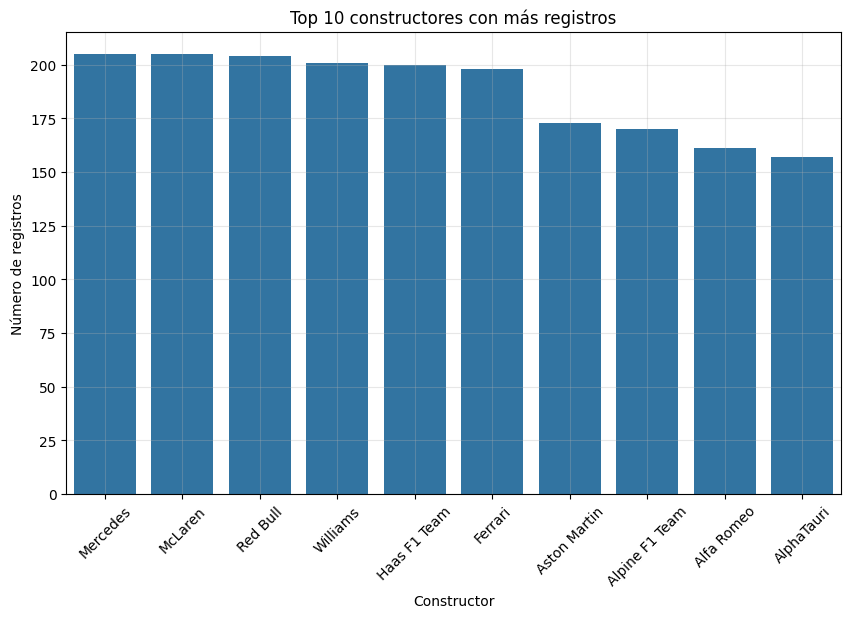

In [36]:
# Top 10 constructores con más registros
top_constructors = df_lastlap['name_constructor'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_lastlap[df_lastlap['name_constructor'].isin(top_constructors)],
    x='name_constructor',
    order=top_constructors,
)
plt.title('Top 10 constructores con más registros')
plt.xlabel('Constructor')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


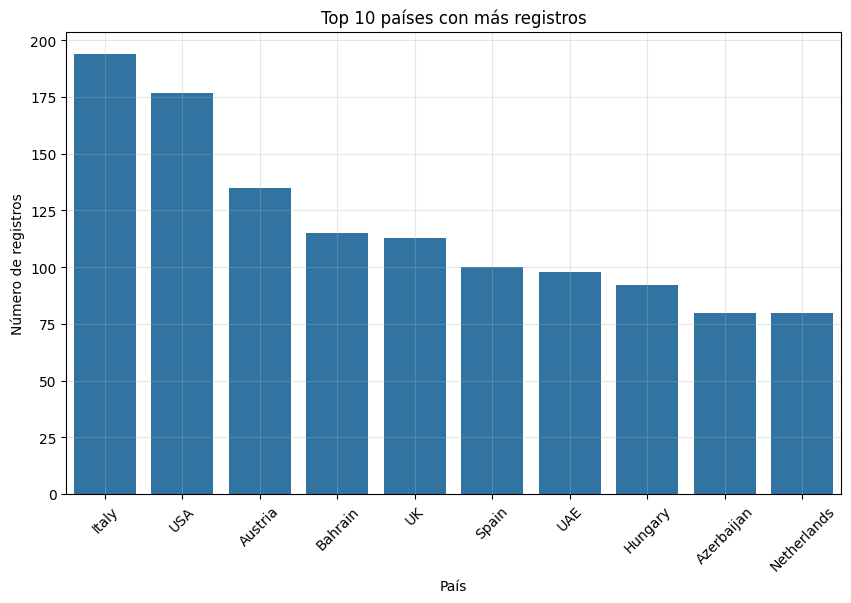

In [37]:
# Top 10 países con más registros
top_countries = df_lastlap['country'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_lastlap[df_lastlap['country'].isin(top_countries)],
    x='country',
    order=top_countries,
)
plt.title('Top 10 países con más registros')
plt.xlabel('País')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

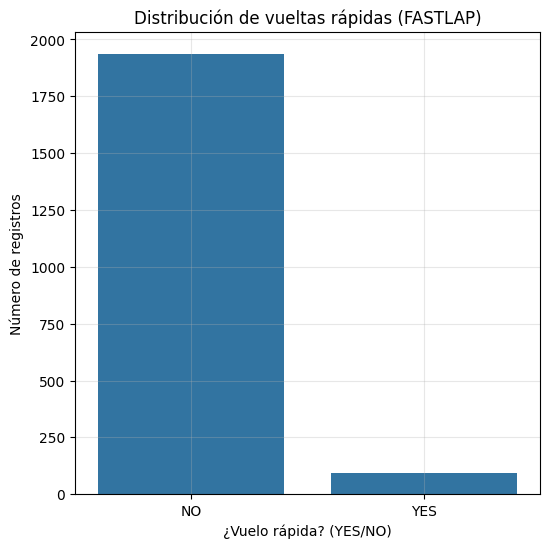

In [38]:
# Distribución de vueltas rápidas (FASTLAP)
plt.figure(figsize=(6,6))
sns.countplot(data=df_lastlap, x='FASTLAP')
plt.title('Distribución de vueltas rápidas (FASTLAP)')
plt.xlabel('¿Vuelo rápida? (YES/NO)')
plt.ylabel('Número de registros')
plt.grid(alpha=0.3)
plt.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_2168\1155685528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lastlap, x='year', y='FASTLAP_sec', palette="coolwarm")


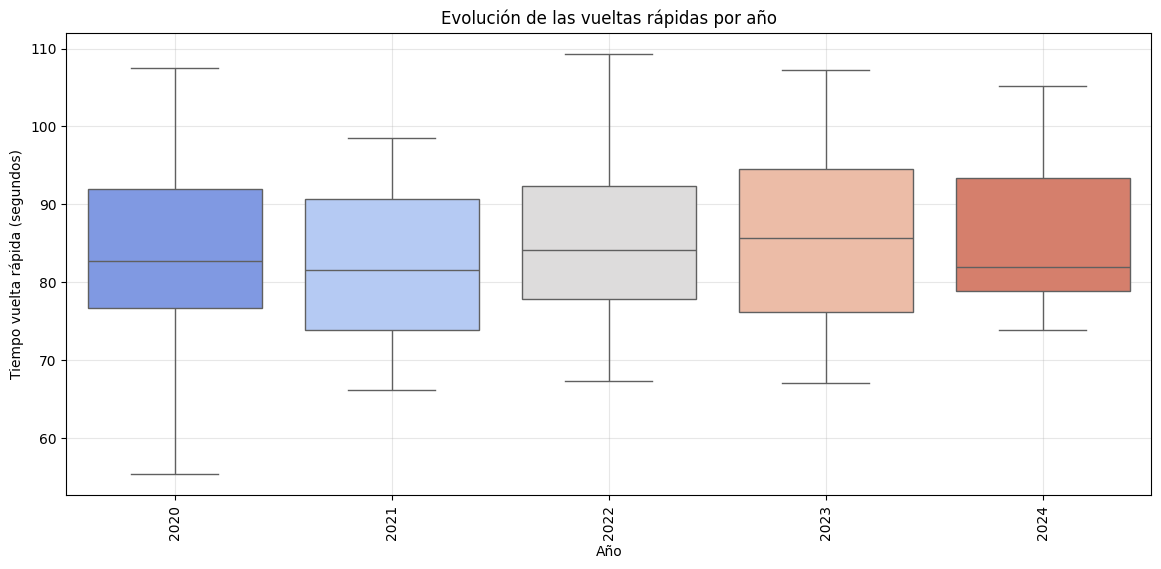

In [39]:
# Evolución de las vueltas rápidas por año
plt.figure(figsize=(14,6))
sns.boxplot(data=df_lastlap, x='year', y='FASTLAP_sec', palette="coolwarm")
plt.title('Evolución de las vueltas rápidas por año')
plt.xlabel('Año')
plt.ylabel('Tiempo vuelta rápida (segundos)')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_2168\2615462838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


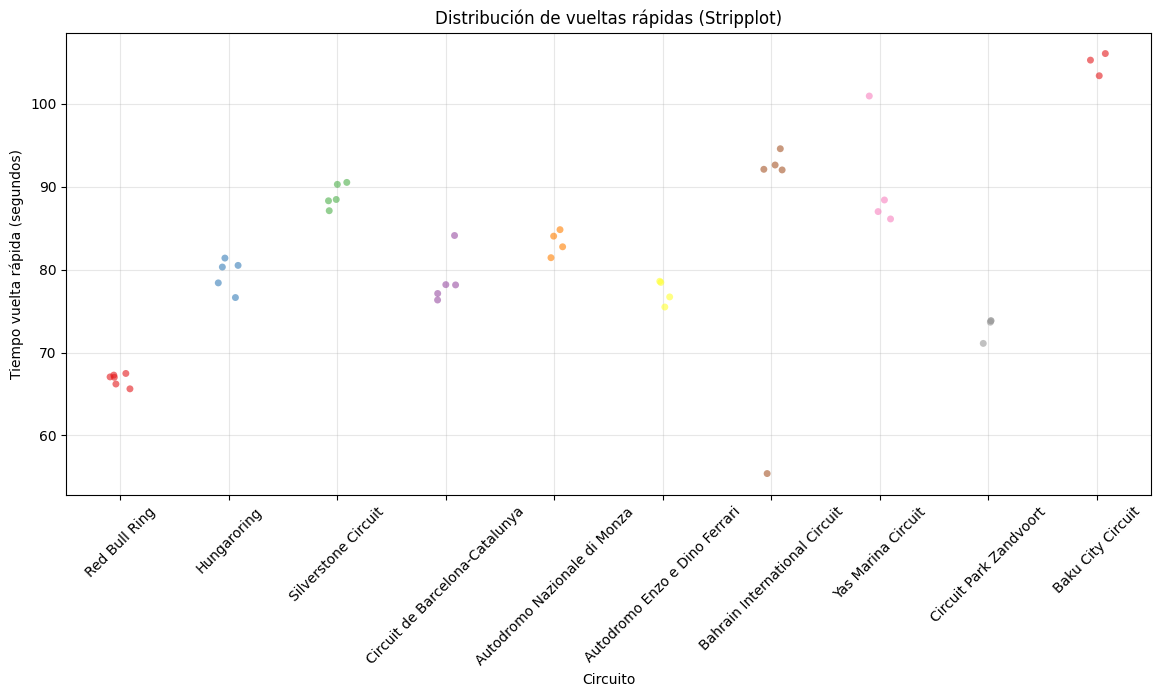

In [40]:
# Top 10 circuitos con más registros en lastlap
top_circuits = (
    df_lastlap["name_circuit"]
    .value_counts()
    .head(10)
    .index
)


plt.figure(figsize=(14,6))
sns.stripplot(
    data=df_lastlap[df_lastlap["name_circuit"].isin(top_circuits) & df_lastlap["FASTLAP_sec"].notna()],
    x="name_circuit",
    y="FASTLAP_sec",
    jitter=True,
    alpha=0.6,
    palette="Set1"
)
plt.title("Distribución de vueltas rápidas (Stripplot)")
plt.xlabel("Circuito")
plt.ylabel("Tiempo vuelta rápida (segundos)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


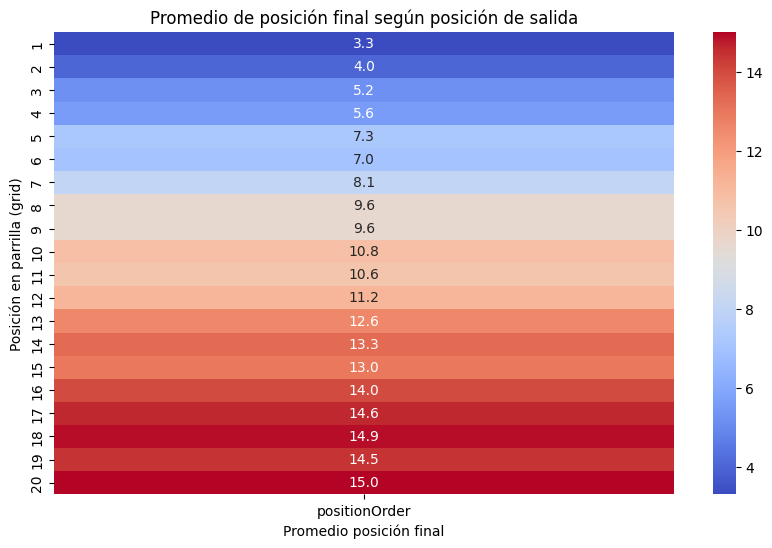

In [41]:
# Grid (salida) vs resultado final
plt.figure(figsize=(10,6))
pivot = df_lastlap[df_lastlap["grid"] > 0].pivot_table(
    values="positionOrder", 
    index="grid", 
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Promedio de posición final según posición de salida")
plt.ylabel("Posición en parrilla (grid)")
plt.xlabel("Promedio posición final")
plt.show()

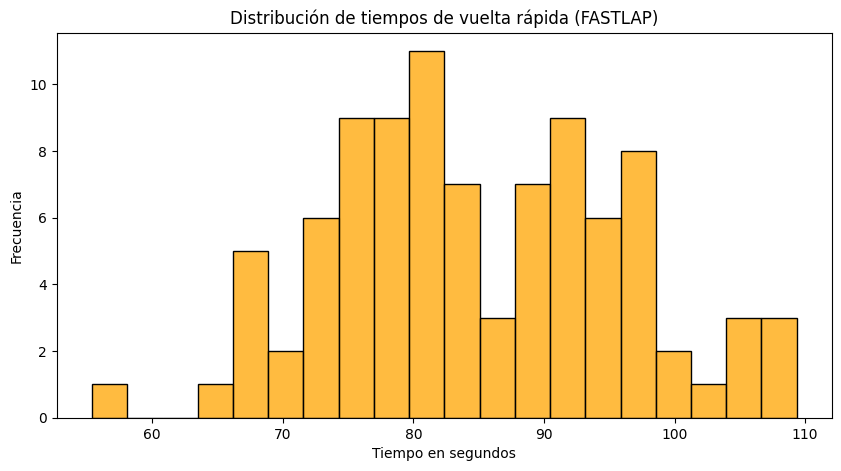

In [42]:
# Vuelta rápida (solo los que hicieron fastest lap)
fastlaps = df_lastlap[df_lastlap["FASTLAP"] == "YES"]
plt.figure(figsize=(10,5))
sns.histplot(fastlaps["FASTLAP_sec"], bins=20, color="orange")
plt.title("Distribución de tiempos de vuelta rápida (FASTLAP)")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Frecuencia")
plt.show()

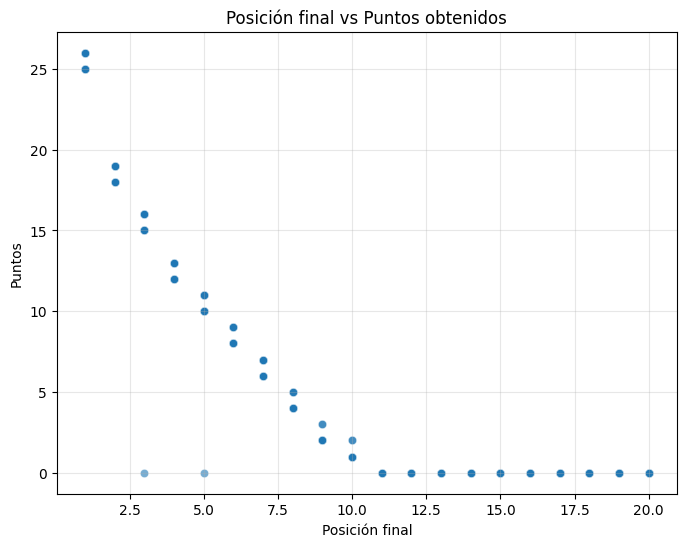

In [43]:
# Relación entre posición final y puntos obtenidos
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_lastlap, x="positionOrder", y="points", alpha=0.6)
plt.title("Posición final vs Puntos obtenidos")
plt.xlabel("Posición final")
plt.ylabel("Puntos")
plt.grid(alpha=0.3)
plt.show()

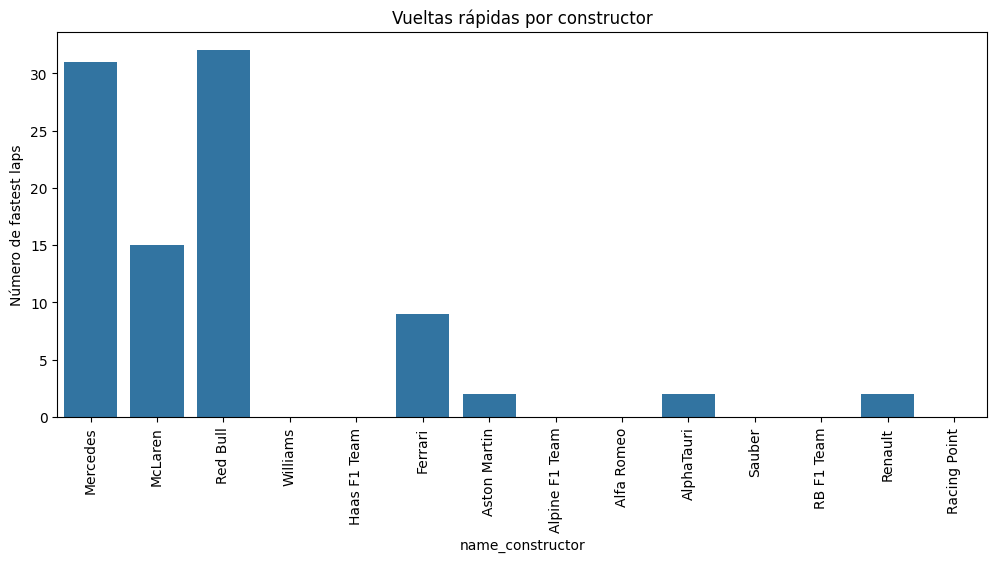

In [44]:
# Vueltas rápidas por constructor
plt.figure(figsize=(12,5))
sns.countplot(data=df_lastlap[df_lastlap["FASTLAP"]=="YES"], 
              x="name_constructor", order=df_lastlap["name_constructor"].value_counts().index)
plt.title("Vueltas rápidas por constructor")
plt.xticks(rotation=90)
plt.ylabel("Número de fastest laps")
plt.show()


## Conclusiones

- Los pilotos que parten desde las primeras posiciones en la parrilla tienden a mantener resultados en meta.
- La vuelta rápida (FASTLAP) suele concentrarse en pilotos con buen desempeño general, aunque no siempre coincide con el ganador de la carrera.
- Los equipos de mayor rendimiento (Mercedes, Red Bull, Ferrari) dominan la mayoría de registros de vueltas rápidas y posiciones destacadas.
- La evolución de posiciones durante la carrera muestra que los adelantamientos son más frecuentes en las posiciones intermedias.
- Las correlaciones entre vueltas y posiciones indican que el ritmo constante es clave para mantener puntos, más allá de la vuelta rápida.
- En términos de temporadas, se observa una concentración de resultados más ajustados en los últimos años, con mayor competitividad entre equipos.